Ivon Saldivar  
A02064927

In [335]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [336]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_analysis = train_data.copy(deep=True)


train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [337]:
all_features = pd.concat((train_data.iloc[:, 2:-1], test_data.iloc[:, 1:-1]))
all_features['Pclass'] = all_features['Pclass'].apply(str)

#del all_features['Cabin']
del all_features['Name']
del all_features['Ticket']

In [338]:
print(all_features.shape)
#print(all_features.to_string())

(1309, 7)


In [339]:
numeric_data = all_features.select_dtypes(exclude=['object'])
categoric_data = all_features.select_dtypes(include=['object'])#.fillna(0)


#Rescale with zero mean and unit variance
numeric_data = numeric_data.replace(to_replace=np.nan, value=0)
numeric_data = (numeric_data - numeric_data.mean())/numeric_data.std()


#categoric_data.loc[categoric_data['Cabin'] != 0]
categoric_data.loc[:, 'Cabin'] = categoric_data.loc[:,'Cabin'].str.slice(0,1)

all_features = pd.concat([numeric_data, categoric_data], axis=1)


print(all_features)

          Age     SibSp     Parch      Fare Pclass     Sex Cabin
0   -0.106733  0.481104 -0.444829 -0.502831      3    male   NaN
1    0.802831  0.481104 -0.444829  0.734597      1  female     C
2    0.120658 -0.478904 -0.444829 -0.489787      3  female   NaN
3    0.632288  0.481104 -0.444829  0.383209      1  female     C
4    0.632288 -0.478904 -0.444829 -0.487371      3    male   NaN
..        ...       ...       ...       ...    ...     ...   ...
413 -1.357383 -0.478904 -0.444829 -0.487371      3    male   NaN
414  0.859679 -0.478904 -0.444829  1.461531      1  female     C
415  0.831255 -0.478904 -0.444829 -0.502831      3    male   NaN
416 -1.357383 -0.478904 -0.444829 -0.487371      3    male   NaN
417 -1.357383  0.481104  0.710492 -0.210867      3    male   NaN

[1309 rows x 7 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [340]:
all_features = all_features.fillna(0)
print(all_features)

          Age     SibSp     Parch      Fare Pclass     Sex Cabin
0   -0.106733  0.481104 -0.444829 -0.502831      3    male     0
1    0.802831  0.481104 -0.444829  0.734597      1  female     C
2    0.120658 -0.478904 -0.444829 -0.489787      3  female     0
3    0.632288  0.481104 -0.444829  0.383209      1  female     C
4    0.632288 -0.478904 -0.444829 -0.487371      3    male     0
..        ...       ...       ...       ...    ...     ...   ...
413 -1.357383 -0.478904 -0.444829 -0.487371      3    male     0
414  0.859679 -0.478904 -0.444829  1.461531      1  female     C
415  0.831255 -0.478904 -0.444829 -0.502831      3    male     0
416 -1.357383 -0.478904 -0.444829 -0.487371      3    male     0
417 -1.357383  0.481104  0.710492 -0.210867      3    male     0

[1309 rows x 7 columns]


In [341]:
all_features = pd.get_dummies(all_features, dummy_na=True)

print(all_features.shape)
all_features.head()

(1309, 21)


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Pclass_nan,Sex_female,Sex_male,Sex_nan,Cabin_0,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan
0,-0.106733,0.481104,-0.444829,-0.502831,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0.802831,0.481104,-0.444829,0.734597,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0.120658,-0.478904,-0.444829,-0.489787,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0.632288,0.481104,-0.444829,0.383209,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0.632288,-0.478904,-0.444829,-0.487371,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0


Organize the data so we can use it

In [342]:
n_train = train_data.shape[0]
train_features = all_features[:n_train].values
test_features = all_features[n_train:].values
train_labels = train_data.Survived.values.reshape((-1, 1))

# I don't know why, but doing "if train_labels == 1:" resulted in everything becoming -10
for i in range(train_labels.shape[0]):
  if train_labels[i] > .5:
    train_labels[i] = 10
  else:
    train_labels[i] = -10


In [343]:
def histogram(data):
  plt.hist(data)
  plt.xlabel('Dead vs Survived')
  plt.ylabel('Quantity')
  plt.show()

**Randomly generated results as a baseline**

     PassengerId  Survived
0            892         1
1            893         1
2            894         1
3            895         1
4            896         0
..           ...       ...
413         1305         1
414         1306         0
415         1307         1
416         1308         0
417         1309         0

[418 rows x 2 columns]


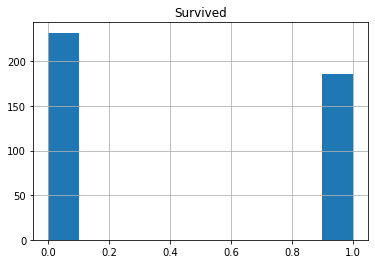

In [344]:
random_results = pd.DataFrame(np.random.randint(0,2,size=(test_data.shape[0], 1)), columns=["Survived"])
random_results.hist()
random_submission = pd.concat([test_data['PassengerId'], random_results], axis=1)
random_submission.to_csv('random_submission.csv', index=False)
print(random_submission)

**No survivors as baseline**

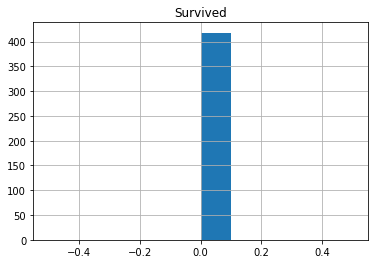

In [345]:
all_dead_results = pd.DataFrame(np.random.randint(0,1,size=(test_data.shape[0], 1)), columns=["Survived"])
all_dead_results.hist()
all_dead_submission = pd.concat([test_data['PassengerId'], all_dead_results], axis=1)
all_dead_submission.to_csv('all_dead_submission.csv', index=False)

**Basic regression model**

In [346]:
import torch.nn as nn
import torch
from torch.autograd import Variable

epochs = 100
inputDim = train_features.shape[1]
outputDim = 1

In [347]:
class BasicRegression(nn.Module):
    def __init__(self, inputSize, outputSize):
      super(BasicRegression, self).__init__()
      self.linear = nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out


basic_learningRate = 0.01 

basic_regression_model = BasicRegression(inputDim, outputDim)

basic_criterion = nn.MSELoss()
basic_optimizer = torch.optim.SGD(basic_regression_model.parameters(), lr=basic_learningRate)

basic_loss = []

def train_basic_regression():
    for epoch in range(epochs):
    # Converting inputs and labels to Variable
      inputs = Variable(torch.from_numpy(train_features)).float()
      labels = Variable(torch.from_numpy(train_labels)).float()


      # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
      basic_optimizer.zero_grad()

      # get output from the model, given the inputs
      outputs = basic_regression_model(inputs)

      # get loss for the predicted output
      loss = basic_criterion(outputs, labels)
      loss.backward()

      # update parameters
      basic_optimizer.step()
      
      basic_loss.append(loss.item() / n_train)




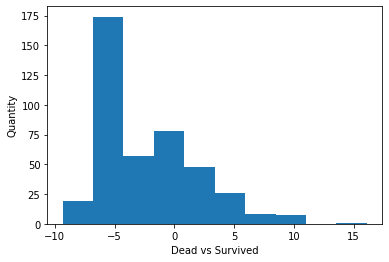

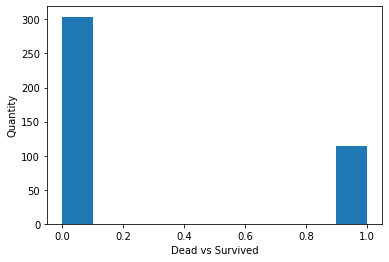

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [348]:
train_basic_regression()

# evaluate test error

basic_regression_predictions = basic_regression_model(Variable(torch.from_numpy(test_features)).float())

histogram(basic_regression_predictions.detach().numpy())



split = 0
basic_regression_predictions[basic_regression_predictions > split] = 1
basic_regression_predictions[basic_regression_predictions <= split] = 0
basic_regression_predictions = basic_regression_predictions.int()

histogram(basic_regression_predictions.numpy())

basic_regression_results = pd.DataFrame(basic_regression_predictions.numpy(), columns=["Survived"])
basic_regression_results = pd.concat([test_data['PassengerId'], basic_regression_results], axis=1)
basic_regression_results.to_csv('basic_regression_results.csv', index=False)
print(basic_regression_results)

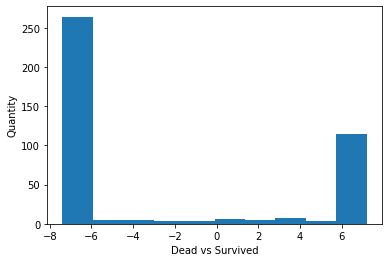

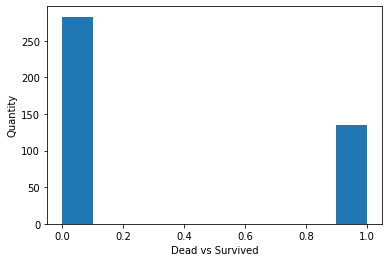

In [349]:
class DeepRegression(nn.Module):
    def __init__(self, inputSize, outputSize):
      super(DeepRegression, self).__init__()
      self.linear = nn.Linear(inputSize, outputSize)
      h = int(inputSize / 2) + outputSize
      self.model = nn.Sequential(
          nn.Linear(inputSize, h),
          nn.Tanh(),
          nn.Linear(h, h),
          nn.Tanh(),
          nn.Linear(h, h),
          nn.Tanh(),
          nn.Linear(h, h),
          nn.Tanh(),
          nn.Linear(h, outputSize)
#          nn.Sigmoid()
      )

    def forward(self, x):
        out = self.model(x)
        return out



deep_learningRate = 0.01 


deep_loss = []

deep_regression_model = DeepRegression(inputDim, outputDim)


deep_criterion = nn.MSELoss()
deep_optimizer = torch.optim.Adam(deep_regression_model.parameters(), lr=deep_learningRate)

def train_deep_regression():
    for epoch in range(epochs):
    # Converting inputs and labels to Variable
      inputs = Variable(torch.from_numpy(train_features)).float()
      labels = Variable(torch.from_numpy(train_labels)).float()


      # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
      deep_optimizer.zero_grad()

      # get output from the model, given the inputs
      outputs = deep_regression_model(inputs)

      # get loss for the predicted output
      loss = deep_criterion(outputs, labels)
      loss.backward()

      # update parameters
      deep_optimizer.step()

      deep_loss.append(loss.item() / n_train)

      #print('epoch {}, loss {}'.format(epoch, loss.item()))


# evaluate test error
train_deep_regression()
deep_regression_predictions = deep_regression_model(Variable(torch.from_numpy(test_features)).float())


histogram(deep_regression_predictions.detach().numpy())


#split = deep_regression_predictions.mean()
split = 0.5
deep_regression_predictions[deep_regression_predictions > split] = 1
deep_regression_predictions[deep_regression_predictions <= split] = 0
deep_regression_predictions = deep_regression_predictions.int()


histogram(deep_regression_predictions.numpy())



deep_regression_results = pd.DataFrame(deep_regression_predictions.numpy(), columns=["Survived"])
deep_regression_results = pd.concat([test_data['PassengerId'], deep_regression_results], axis=1)
deep_regression_results.to_csv('deep_regression_results.csv', index=False)

Plotting the loss functions for the models.

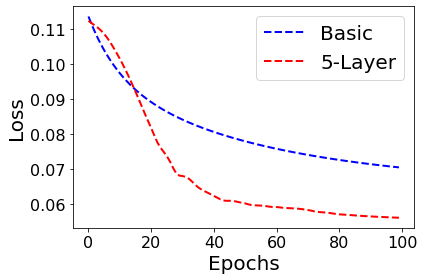

In [350]:

fig = plt.figure(figsize=(6, 4))

epochs_basic = range(len(basic_loss))
epochs_deep = range(len(deep_loss))


line0, = plt.plot(epochs_basic, basic_loss, '--b', LineWidth=2)
line1, = plt.plot(epochs_deep, deep_loss, '--r', LineWidth=2)
plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Loss', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line0, line1], ['Basic', '5-Layer'], fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig('compare_basic_deep.pdf', format='pdf', dpi=1200)

Here I extracted some information from the training data, although not everything I extracted is still listed.

In [351]:
#train_analysis = pd.DataFrame(train_data.numpy(), columns = ["Survived"])
train_analysis = train_data.copy(deep=True)
del train_analysis['Name']
del train_analysis['PassengerId']
del train_analysis['Ticket']
train_analysis.loc[:, 'Cabin'] = train_analysis.loc[:,'Cabin'].str.slice(0,1)

femaleCount = train_analysis[train_analysis['Sex'] == "female"].count()[1]
femaleSurvived = train_analysis[(train_analysis['Sex'] == "female") & (train_analysis["Survived"] > 0)].count()[1]
print("Of the {} women, {} survived.".format(femaleCount, femaleSurvived));


maleCount = train_analysis[train_analysis['Sex'] == "male"].count()[1]
maleSurvived = train_analysis[(train_analysis['Sex'] == "male") & (train_analysis["Survived"] > 0)].count()[1]
print("Of the {} men, {} survived.".format(maleCount, maleSurvived));




Of the 314 women, 233 survived.
Of the 577 men, 109 survived.
